In [1]:
import numpy as np
import pandas as pd
from os import chdir, listdir, mkdir
from os.path import isfile, splitext, join, exists
import umap
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from collections import Counter
import random 
import matplotlib.patches as mpatches

#wd="/mnt/storage5/anton/Amplicon/Leen/temp/"
#wd="/mnt/storage5/anton/Amplicon/Holly/temp/"
#wd="/mnt/storage5/anton/Amplicon/LeenIllumina/"
#wd="/mnt/storage5/anton/Amplicon/Ashley/temp/"
wd="/mnt/storage5/anton/Amplicon/LeenNewBarcodes/temp/"

In [2]:

MSAmatrices = [f for f in listdir(wd) if isfile(join(wd, f)) and splitext(f)[1]==".pkl"]

matrixData={}
for matrix in MSAmatrices:
    matrixData[matrix.replace("mafft","").replace(".pkl","")]=pd.read_pickle(wd+matrix)
i=0

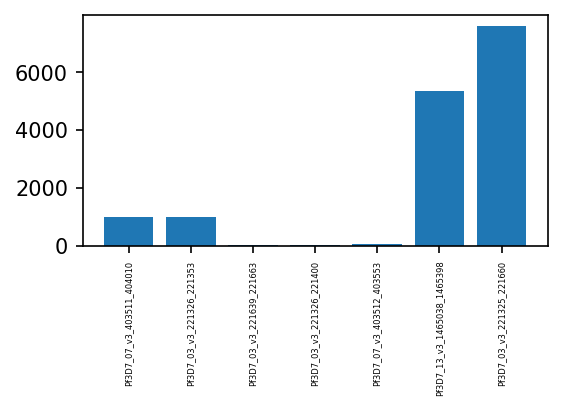

In [7]:
#show regional read densities
readDepths=[]
regions=[]
for region in matrixData.keys():
    readDepths.append(matrixData[region].shape[0])
    regions.append(region)
figure(figsize=(4, 2), dpi=150)
plt.bar(x=range(0,len(readDepths)), height=readDepths, tick_label=regions)
plt.xticks(rotation=90,  fontsize=4)
plt.show()

In [8]:
#This will create clustering plot of reads in each region. Each point is a read
####!!!! Must use hamming distance because the MSA matrix has columns=pair-read length. Each cell has value 1-5 for A,C,T,G,- which works with hamming distance in sklearn
minReadDepth=50
for region in matrixData:
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1).to_numpy()
    n_neighbors_val=min(30, int(data.shape[0]*0.1))
    all_reads_embedding = umap.UMAP(n_neighbors=n_neighbors_val, min_dist=0.01, metric='hamming').fit_transform(data)
    clustering = DBSCAN(eps=1, min_samples=5).fit(all_reads_embedding).labels_
    print(Counter(clustering))
    
    if not exists(wd+"/../clusteringPlots/"):
        mkdir(wd+"/../clusteringPlots/")

    outputFileName=region.replace(":","_")#: is problematic for Windows
    groupsDF=pd.DataFrame( {"cluster": clustering+1})# +1 is required because the easiest aggregate function counts non-zero values
    groupsDF["Sample"]=matrixData[region]["Sample"]
    SampleXClusters=pd.pivot_table(groupsDF,index="Sample", columns="cluster", aggfunc=np.count_nonzero)
    SampleXClusters.to_csv(wd+"/../clusteringPlots/"+outputFileName+".tsv",sep="\t")

    plt.scatter(all_reads_embedding[:,0],all_reads_embedding[:,1], s=2, c=clustering)
    plt.title(region)
    plt.savefig(wd+"/../clusteringPlots/"+outputFileName+".jpg",bbox_inches='tight')
    plt.close() #this saves the plots    
    #plt.show()



/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({14: 185, 5: 163, 13: 124, 4: 99, 0: 89, 1: 68, 3: 63, 11: 53, 8: 33, 9: 32, 7: 26, 10: 17, 15: 17, 6: 13, 12: 13, 2: 8})


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({0: 510, 1: 490})


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({1: 26, 2: 17, 0: 7})


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({23: 923, 0: 876, 18: 661, 6: 326, 24: 308, 21: 287, 15: 230, 1: 190, 4: 183, 12: 178, 11: 175, 5: 125, 9: 90, 20: 89, 8: 88, 2: 87, 17: 76, 14: 73, 16: 71, 13: 67, 7: 66, 19: 64, 3: 61, 22: 42, 10: 40})


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({24: 953, 29: 839, 18: 802, 26: 790, 20: 336, 1: 334, 17: 318, 0: 302, 6: 301, 9: 281, 21: 258, 7: 238, 3: 176, 12: 151, 27: 145, 22: 141, 5: 127, 19: 115, 11: 110, 28: 107, 2: 100, 15: 98, 23: 92, 30: 75, 16: 74, 13: 68, 14: 65, 25: 62, 10: 56, 4: 53, 8: 50})


(1003, 297)


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({4: 216, 12: 183, 11: 124, 0: 89, 9: 70, 1: 68, 3: 63, 7: 59, 5: 46, 8: 32, 6: 30, 10: 13, 2: 10})


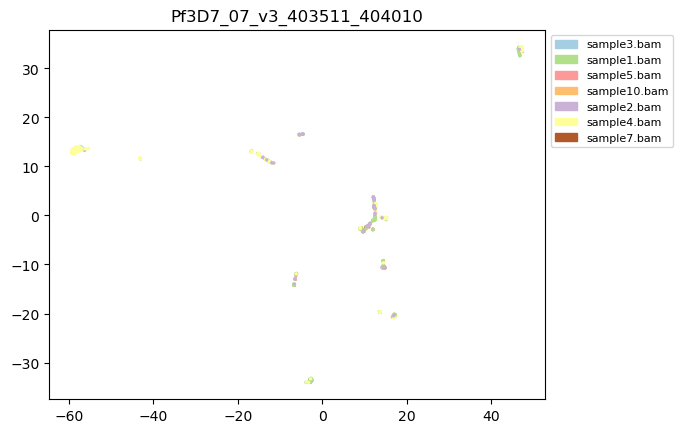

(1000, 28)


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({0: 510, 1: 490})


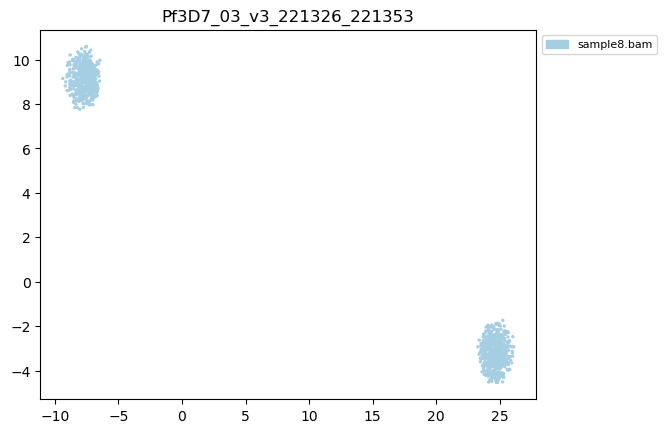

(14, 25)
(24, 75)
(50, 44)


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Counter({1: 26, 0: 24})


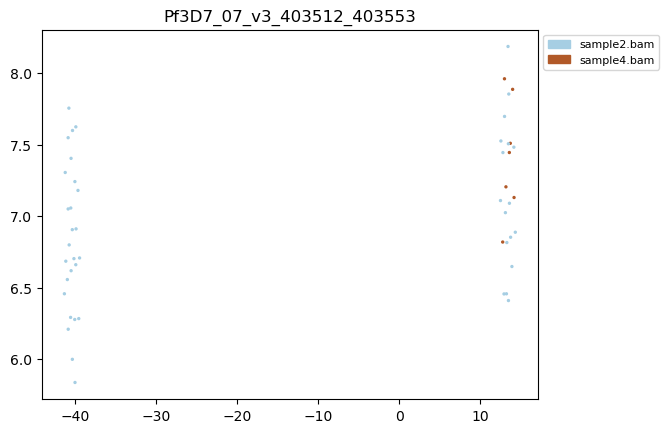

(5376, 250)


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({0: 987, 17: 921, 13: 653, 6: 335, 18: 320, 16: 299, 1: 266, 8: 207, 5: 194, 10: 187, 4: 181, 7: 172, 11: 152, 14: 100, 9: 92, 15: 90, 2: 88, 12: 71, 3: 61})


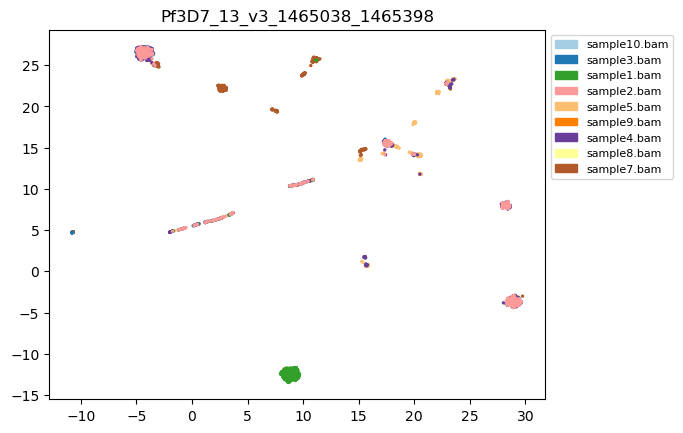

(7617, 257)


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Counter({19: 952, 22: 844, 15: 802, 20: 785, 6: 662, 1: 508, 3: 482, 4: 358, 16: 347, 14: 328, 18: 297, 5: 278, 10: 208, 2: 102, 21: 100, 0: 95, 17: 80, 23: 75, 13: 74, 11: 68, 12: 65, 9: 56, 7: 38, 8: 13})


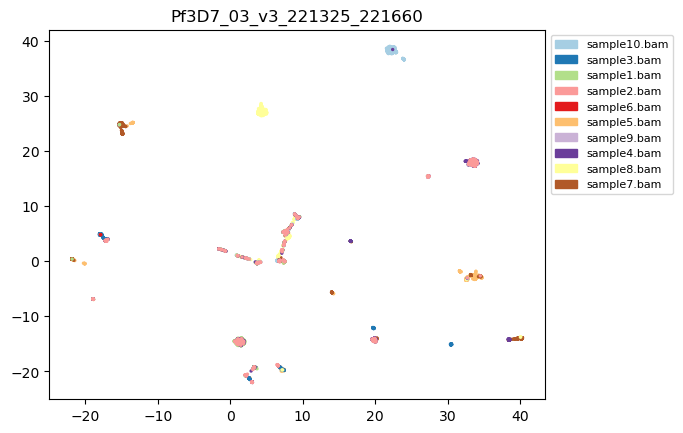

In [37]:
#This will create clustering plot of reads in each region and will colour points by sample the reads are from. Each point is a read
minReadDepth=30
for region in matrixData:
    print(matrixData[region].shape)
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1)

    samples=[f for f in matrixData[region]["Sample"].values]
    regionColoursDic={}
    regionsCmap=plt.cm.get_cmap('Paired', len(set(samples)))
    for sample in set(samples):
        regionColoursDic[sample]=regionsCmap( len(regionColoursDic) / len(set(samples)) )

    X_embedded = umap.UMAP(n_neighbors=50, min_dist=0.1, metric='hamming').fit_transform(data)
    clustering = DBSCAN(eps=1, min_samples=5).fit(X_embedded).labels_
    print(Counter(clustering))
    
    plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2, c=[  regionColoursDic[f] for f in samples])
    plt.title(region)
    legendElements=[]
    for key in regionColoursDic:
        legendElements.append(mpatches.Patch(color=regionColoursDic[key], label=key))
    plt.legend(bbox_to_anchor=(1,1), handles=legendElements,prop={'size': 8}, loc="upper left")
    #plt.savefig(wd+"/../clusteringPlots/"+region+".jpg",bbox_inches='tight')
    #plt.close() #this saves the plots
    plt.show() #this shows them here


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Cluster sizes:Counter({1: 40, 0: 21})
Total positions: 296
     0  1
122  C  T


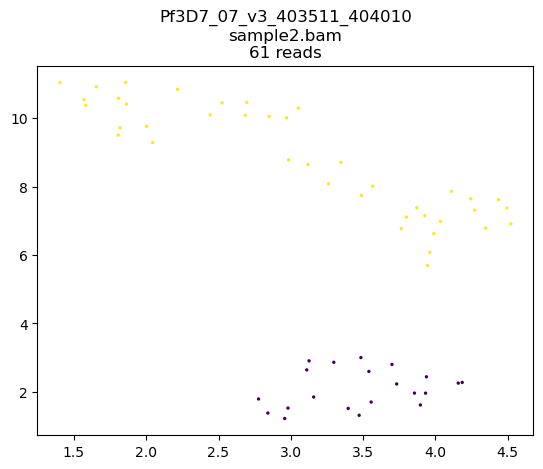

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


Cluster sizes:Counter({0: 43})
Total positions: 43
Empty DataFrame
Columns: [0]
Index: []


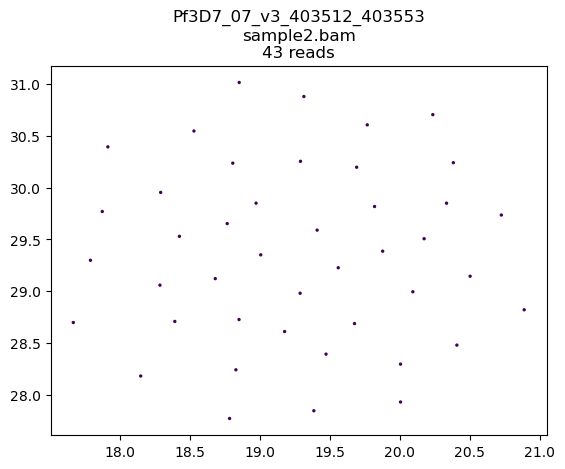

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Cluster sizes:Counter({0: 433, 1: 185, 3: 156, 2: 152, -1: 74})
Total positions: 249
     0  1  2  3
2    G  A  G  A
14   T  C  T  C
20   G  A  G  A
166  A  G  G  A


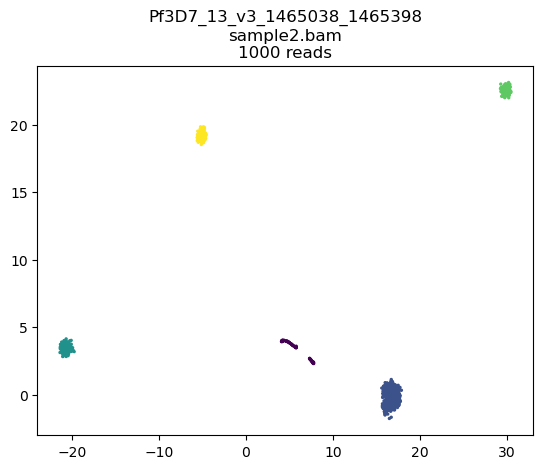

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


Cluster sizes:Counter({2: 471, 0: 206, -1: 165, 1: 158})
Total positions: 256
     0  1  2
18   G  G  T
140  G  C  C
153  C  G  G
156  T  C  C
205  C  T  T


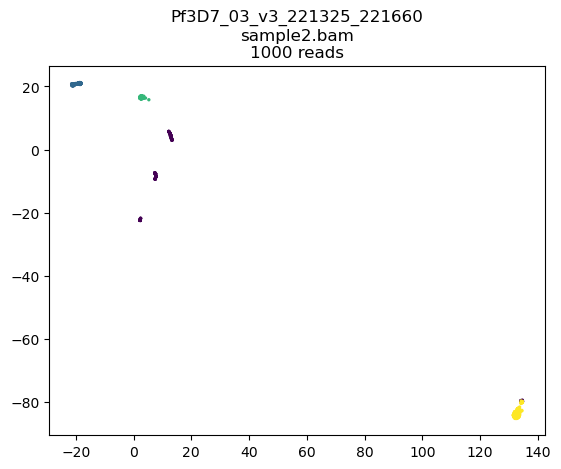

In [103]:
#This will create clustering plot of reads in each region for a given sample
sample="sample2.bam"
minReadDepth=30
for region in matrixData:
    data=matrixData[region].drop("Sample",axis=1)

    samples=[f for f in matrixData[region]["Sample"].values]
    samplesReads=np.where(np.asarray(samples)==sample)[0]
    if len(samplesReads)<minReadDepth:
        continue


    X_embedded = umap.UMAP(n_neighbors=50, min_dist=0.1, metric='hamming').fit_transform(data.to_numpy()[samplesReads,:])

    #### Amend 0.1 to betwee 0-1 to change the minimum size of cluster (0.1=10% of total samples). This will decrease overall number of clusters 
    #### and increase number of reads which are not assigned to any cluster (i.e. ambigous)
    clustering = DBSCAN(eps=2, min_samples=max(5,int(X_embedded.shape[0]*0.1))).fit(X_embedded).labels_
    clusterSizes=Counter(clustering)
    print("Cluster sizes:"+str(clusterSizes))
    totalClusters=len(clusterSizes)-1 if -1 in clustering else len(Counter(clustering))
    clusterSNPs=pd.DataFrame(index=range(len(data.columns)),  columns=list(clusterSizes.keys()))
    if -1 in clusterSNPs.columns:
        clusterSNPs=clusterSNPs.drop(columns=[-1])
    
    snpMatrix=data.to_numpy()[samplesReads,:]
    #Assign the dominant base to each SNP position
    numberToBase={1:"A",2:"T",3:"C",4:"G",5:"-"}
    positionsToDrop=[]
    for i in range(0, len(data.columns) ):
        for cluster in clusterSizes:
            if cluster==-1:
                continue
            clusterReads=np.where(clustering==cluster)[0]
            mostFrequentBase=Counter(snpMatrix[clusterReads,i])
            clusterSNPs.at[i,cluster]=numberToBase[mostFrequentBase.most_common(1)[0][0]]#+"/"+numberToBase[mostFrequentBase.most_common(2)[0][0]] #for diploids only
        if len(set(clusterSNPs.iloc[i]))==1 or (len(set(clusterSNPs.iloc[i]))==2 and "-" in set(clusterSNPs.iloc[i])):
            ###the positions with no SNPs or only missing base are ignored
            positionsToDrop.append(i)

    #remove rows which have invariant dominant bases
    clusterSNPs=clusterSNPs.drop(index=positionsToDrop)
    print("Total positions: "+str(len(data.columns)))
    print(clusterSNPs.to_string())

    plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2, c=clustering)
    plt.title(region+"\n"+sample+"\n"+str(len(samplesReads))+" reads")
    plt.show() #this shows them here
    #break
